# EDA
I will start with exploring the dataset and trying to get more into it. To do any further analysis and modifications I need to understand it. My main tools for this purpose will be python (jupyter notebooks) , where I will be exploring the data. Secondly I will use Excelfor documentation and reporting. Using Excel in this project will is mainly intended to make it easier for other people who do not know python,sql etc. to view my work and to perform simple operations that do not require advanced technologies.
Tasks:

* Load and prepare data for EDA in jupyter notebook✅
* Display basic statistics✅
* check for missing values and duplicates✅
* analyze distribution of categorical variables✅
* create charts, plots etc. if needed✅
* export key statistics to excel file for documentation✅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import openpyxl
from openpyxl.drawing.image import Image

In [2]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Get dataset as dataframe
df = pd.read_csv(r"C:\Users\Adam\Desktop\main\programming\Data An EN\projects\IBM HR Employee Atttition\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
# more precise description
short_desc = df.describe()
short_desc

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# are there any duplicates?
df.duplicated().sum()

np.int64(0)

In [7]:
# num of columns
len(df.columns)

35

## NOTES
There we go! Now we have some basic informations about our dataset. There are no missing values, dataset is dominated by the numerical features (columns), there are no duplicates and we have 35 features. On first glance we can already see some interesting informations, like:
* average employee's age is 36,
* employees are quite often beeing promoted and simillary they often change their managers
* on average employees work about 7 years in company
  
Some of the columns are categorical and they are not intuitive if it comes to they interpretation. E.g. JobInvolvement, JobLevel, JobSatysfaction... To understand more about this data we need to know the scale. For example if average job satisfaction is 2.7 and scale is 0-5 than the score is not bad, but if the scale is 1-10... Well we need to figure that out

In [10]:
# First we need to get the list of categorical features. Key cat features:
cat_features = ['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

# Create dataframe with min and max values
range_values = {
    'Feature': cat_features,
    'Min': [df[col].min() for col in cat_features],
    'Max': [df[col].max() for col in cat_features]
}
ranges_df = pd.DataFrame(range_values)

ranges_df

,Feature,Min,Max
0,Education,1,5
1,EnvironmentSatisfaction,1,4
2,JobInvolvement,1,4
3,JobLevel,1,5
4,JobSatisfaction,1,4
5,PerformanceRating,3,4
6,RelationshipSatisfaction,1,4
7,WorkLifeBalance,1,4


In [9]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

### NOTE
PerformanceRating-In an HR analytics dataset, the PerformanceRating column likely represents an employee's performance evaluation score given by the company. It is often rated from 1-poor performance to 5-outstanding performance. Since we don't have a precise information about this feature we need to assume that employees are meeting expetations and some of them are above of this. Some of these categorical features are described as:

 Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [19]:
#Full list of the cat features:
cat_features=['Attrition', 'BusinessTravel', 'Department', 'Education','EnvironmentSatisfaction',
              'Gender', 'JobInvolvement','JobLevel','JobRole', 'MaritalStatus','Over18','OverTime',
              'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
for col in cat_features:
    #print(f"Feature: {col}\n")
    print(df[col].value_counts(), "\n")

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64 

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64 

Gender
Male      882
Female    588
Name: count, dtype: int64 

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64 

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources      

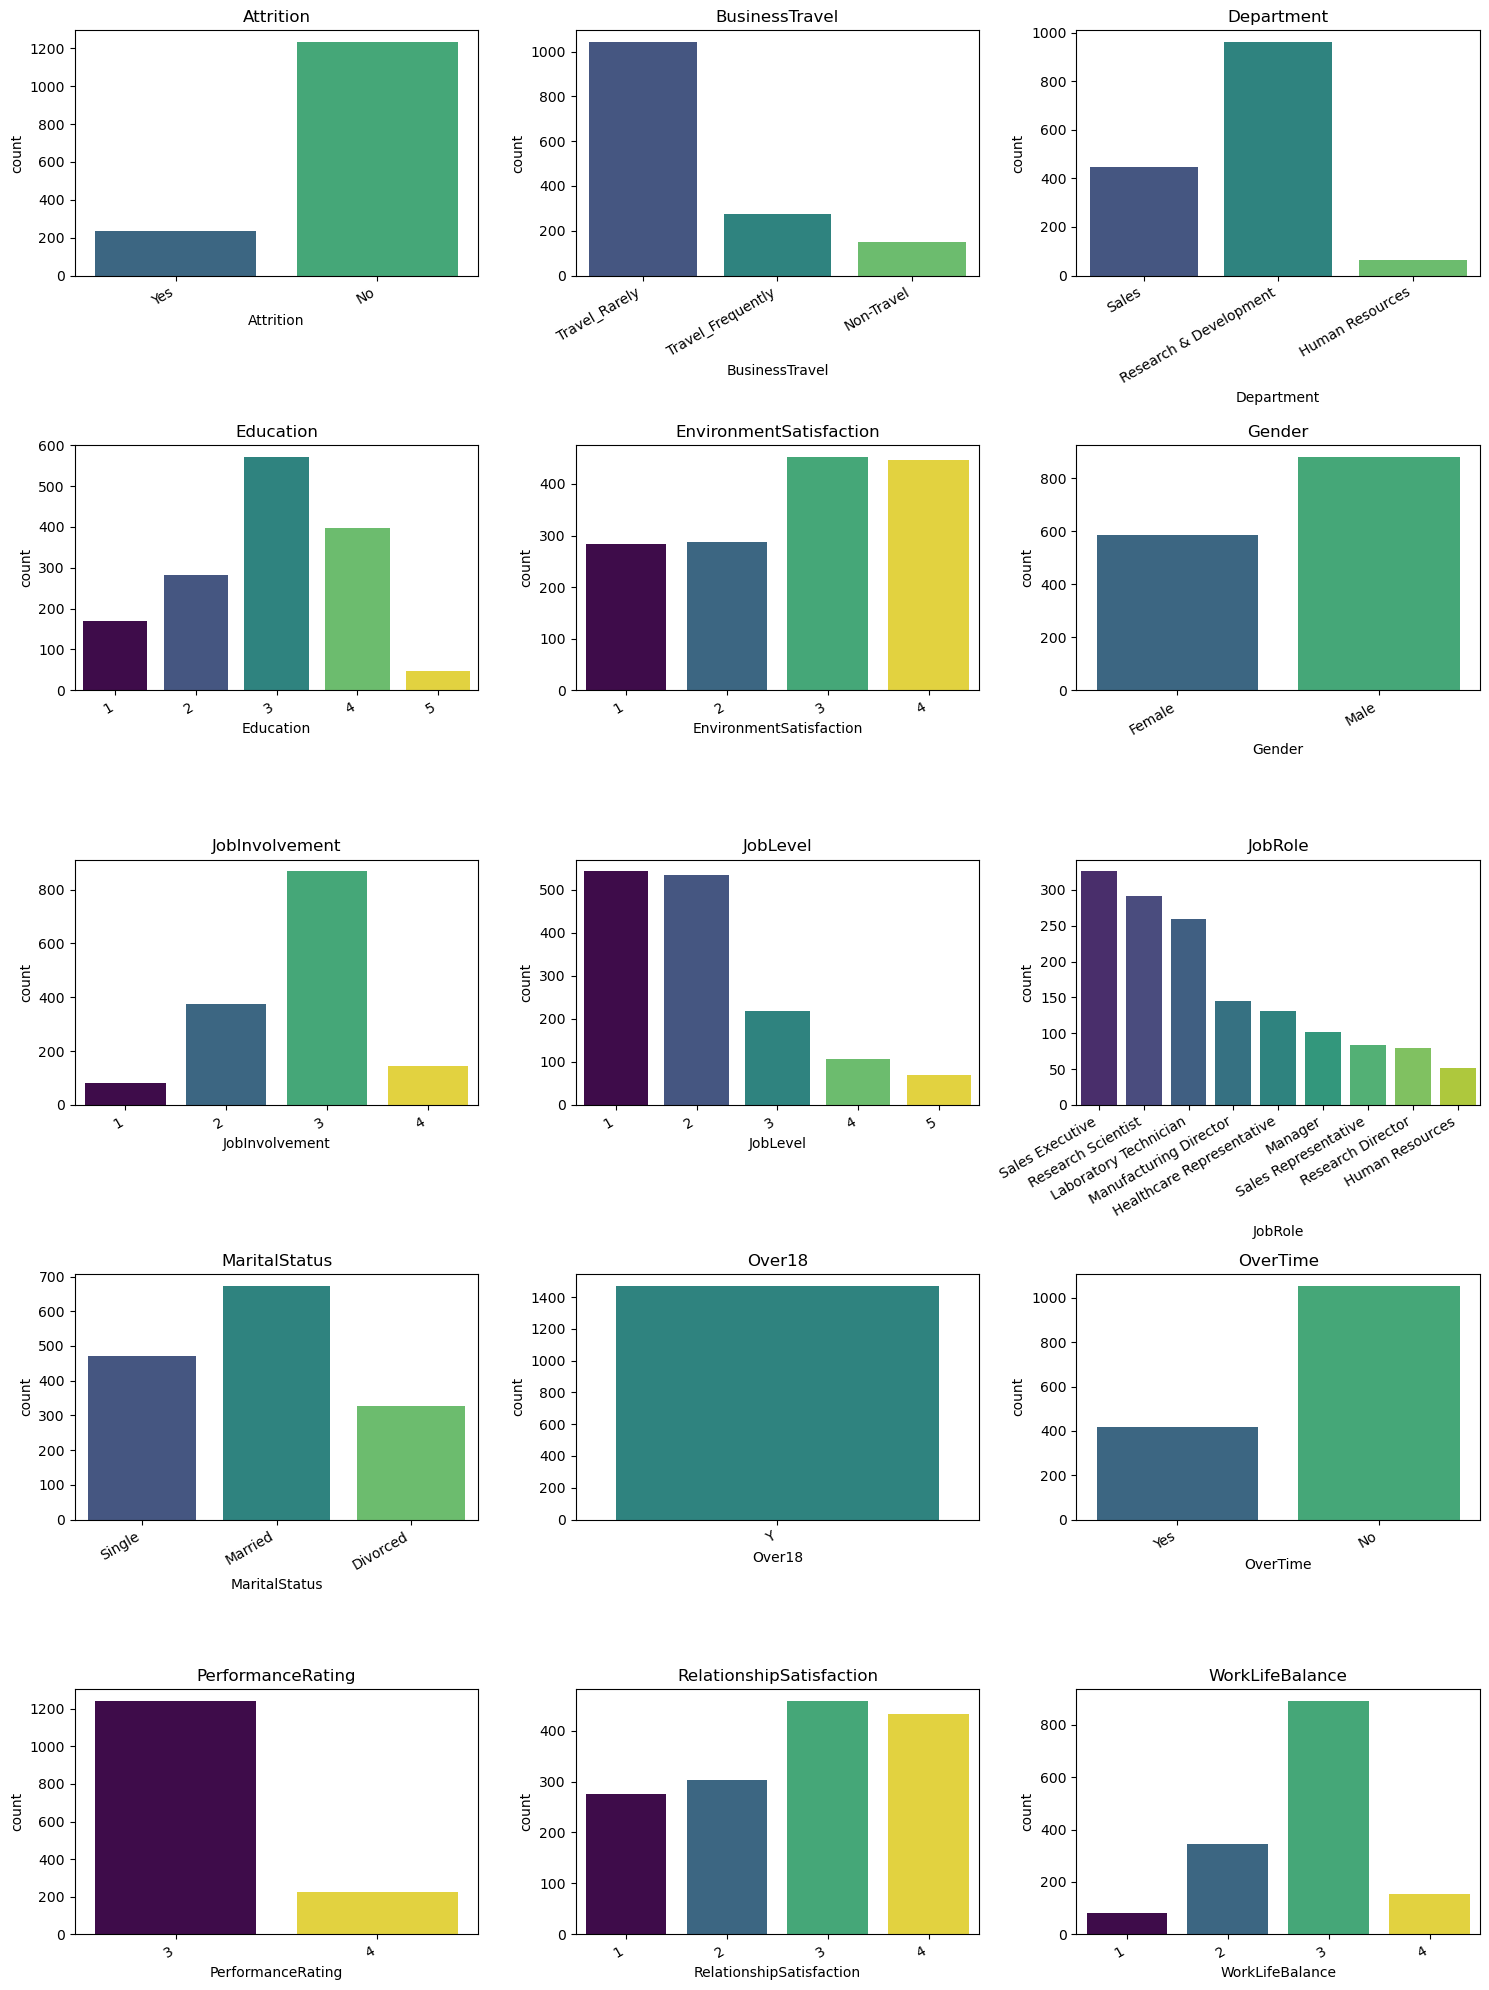

In [51]:
# now lets represent our data visually
cat_features=['Attrition', 'BusinessTravel', 'Department', 'Education','EnvironmentSatisfaction',
              'Gender', 'JobInvolvement','JobLevel','JobRole', 'MaritalStatus','Over18','OverTime',
              'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
n_features = len(cat_features)
n_cols = 3  
n_rows = 5 

distribution, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  

# flatten axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette="viridis", legend=False)  # Fix warning
    axes[i].set_title(col)
    axes[i].set_xticks(axes[i].get_xticks())  # ensure tick positions are set
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()  
plt.show()

### NOTE
It is time to write some of my findings to excel for easier access.

In [52]:
distribution.savefig("distributionOfCategorical.png")

In [56]:
with pd.ExcelWriter('output.xlsx', engine='openpyxl') as writer:
    ranges_df.to_excel(writer, sheet_name='categoricalFeatureRanges',index=False)
    short_desc.to_excel(writer, sheet_name='basicStatistics', index=True)

In [11]:
print(", ".join(df.columns))

Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
